<span style='color:orange'>

ELIZABETH GONZALEZ - PRESENCIAL -TARDE<h1>

DATA SCIENCE

SPRINT 4

S04 T01: Graphically summarize the DelayedFlights.csv data set
    
</span>

<span style='color:purple'>
<h3>Level 1

<span style='color:purple'>
<h4>

4.1.1 Exercise 

Create at least one visualization for:
</span>

Note: 
Names of new columns and new tables still have uppercase letters because that is how we had them in the previous task

In [260]:
#Import libraries
import pandas as pd # Importacion estandar de la libreria Pandas
import numpy  as np # Importacion estandar de la libreria NumPy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import plotly.graph_objects as go
import cufflinks as cf
import dash
import warnings
from dash import dcc
from dash import html
from scipy import stats
from scipy.stats import trim_mean
from dash.dependencies import Input, Output
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
warnings.filterwarnings('ignore')

#from IPython.display import display,HTML

df = pd.read_csv ('/Users/elizabeth/Desktop/JUP_EGE/S03 T05/DelayedFlights.csv')  

layout = df
layout['row'] = np.arange(len(layout))

In [ ]:
# Sumarize data null per column
print ('DATA WITH NULL INFORMATION BY COLUMNS')
layout['ArrTime'].isnull().sum()

In [153]:
layout.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
row                    int64
dtype: object

In [322]:
#Add the mean of statistically relevant columns in a new column

layout['arr_delay_mean']=layout['ArrDelay'].describe()['mean']
layout['dep_delay_mean']=layout['DepDelay'].describe()['mean']
layout['distance_mean']=layout['Distance'].describe()['mean']
layout['weather_delay_mean']=layout['WeatherDelay'].describe()['mean']
layout['carrier_delay_mean']=layout['CarrierDelay'].describe()['mean']

<span style='color:purple'>
<h4>

* A numeric variable (ArrDelay)
</span>

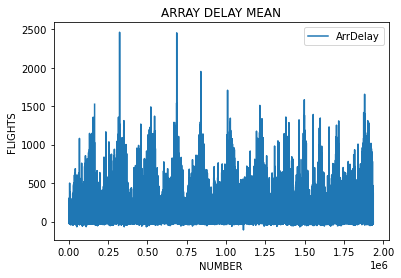

<Figure size 432x288 with 0 Axes>

In [277]:
layout.groupby('row').mean().loc[:,['ArrDelay']].plot()
plt.title('ARRAY DELAY MEAN')
plt.xlabel('NUMBER')
plt.ylabel('FLIGHTS')
plt.show()
plt.savefig('fig1.png')

<span style='color:purple'>
<h4>

    
* A numeric variable (ArrDelay)

</span>

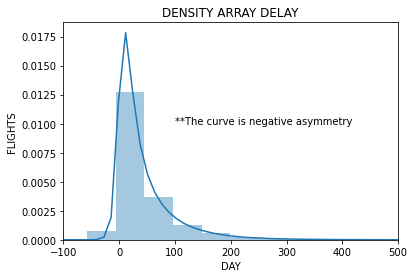

In [298]:
#Normal graphic for Arrive Delay

data = np.random.randn(500)
sns.distplot(layout['ArrDelay'])
plt.xlim(-100, 500)
plt.text(100,.01, '**The curve is negative asymmetry')
plt.title('DENSITY ARRAY DELAY')
plt.xlabel('DAY')
plt.ylabel('FLIGHTS')
plt.savefig('fig2.png')

<span style='color:purple'>
<h4>

    
* A categorical variable (UniqueCarrier)
   
</span>

===================== HORIZONTAL BAR GRAPH FOR 1 VAR CAT ======================


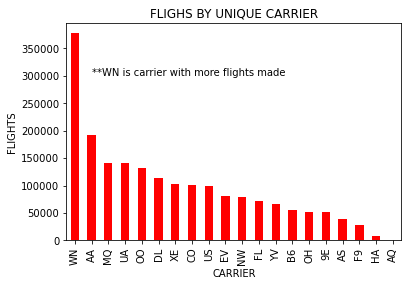

<Figure size 432x288 with 0 Axes>

In [299]:
print('===================== HORIZONTAL BAR GRAPH FOR 1 VAR CAT ======================')
plot = layout['UniqueCarrier'].value_counts().plot(kind='bar', color='red')
plt.text(1,300000, '**WN is carrier with more flights made')
plt.title('FLIGHS BY UNIQUE CARRIER')
plt.xlabel('CARRIER')
plt.ylabel('FLIGHTS')
plt.show()
plt.savefig('fig3.png')

<span style='color:purple'>
<h4>

    
* A categorical variable (UniqueCarrier)
   
</span>

===================== VERTICAL BAR GRAPH FOR 1 VAR CAT ======================


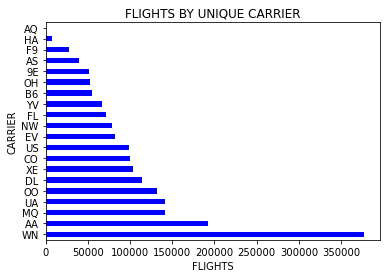

<Figure size 432x288 with 0 Axes>

In [167]:
print('===================== VERTICAL BAR GRAPH FOR 1 VAR CAT ======================')
plot = layout['UniqueCarrier'].value_counts().plot(kind='barh',color='blue')
plt.title('FLIGHTS BY UNIQUE CARRIER')
plt.xlabel('FLIGHTS')
plt.ylabel('CARRIER')
plt.show()
plt.savefig('fig4.png')

<span style='color:purple'>
<h4>
  

* A numeric variable and a categorical variable (ArrDelay and UniqueCarrier)
   
</span>

===================== HORIZONTAL BAR GRAPH FOR 1 VAR NUM & 1 VAR CAT ======================


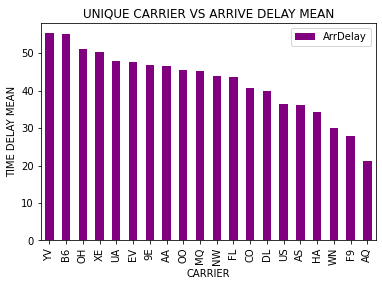

<Figure size 432x288 with 0 Axes>

In [247]:
print('===================== HORIZONTAL BAR GRAPH FOR 1 VAR NUM & 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay']].sort_values(by='ArrDelay',ascending=False).plot(kind='bar', color='purple')
plt.title('UNIQUE CARRIER VS ARRIVE DELAY MEAN')
plt.xlabel('CARRIER')
plt.ylabel('TIME DELAY MEAN')
plt.legend();
plt.show()
plt.savefig('fig5.png')

<span style='color:purple'>
<h4>

    
* A numeric variable and a categorical variable (ArrDelay and UniqueCarrier)
   
</span>

===================== HORIZONTAL BAR GRAPH FOR 1 VAR NUM & 1 VAR CAT ======================


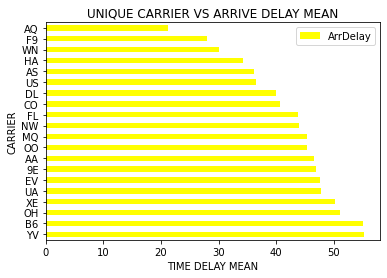

<Figure size 432x288 with 0 Axes>

In [169]:
print('===================== HORIZONTAL BAR GRAPH FOR 1 VAR NUM & 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay']].sort_values(by='ArrDelay',ascending=False).plot(kind='barh', color='yellow')
plt.title('UNIQUE CARRIER VS ARRIVE DELAY MEAN')
plt.xlabel('TIME DELAY MEAN')
plt.ylabel('CARRIER')
plt.legend();
plt.show()
plt.savefig('fig6.png')

<span style='color:purple'>
<h4>

    
* Dues variables numèriques (ArrDelay and DepDelay)
   
</span>

===================== BAR GRAPHIC FOR 2 VAR NUM ======================


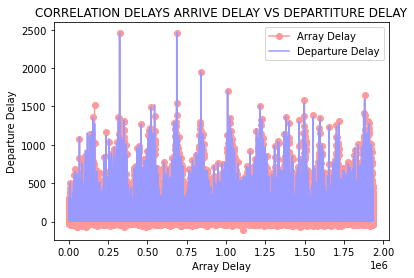

In [170]:
import matplotlib.pyplot as plt
print('===================== BAR GRAPHIC FOR 2 VAR NUM ======================')
figC, Arr_Delay_Dep_Delay = plt.subplots(1, 1, figsize=(6,4))
Arr_Delay_Dep_Delay.plot(layout.ArrDelay, label='Array Delay', color='#ff9999', marker='o')
Arr_Delay_Dep_Delay.plot(layout.DepDelay, label='Departure Delay', color='#9999ff')
Arr_Delay_Dep_Delay.set_xlabel('Array Delay')
Arr_Delay_Dep_Delay.set_ylabel('Departure Delay')
Arr_Delay_Dep_Delay.set_title('CORRELATION DELAYS ARRIVE DELAY VS DEPARTITURE DELAY')
Arr_Delay_Dep_Delay.legend();
figC.savefig('fig7.png')

<span style='color:purple'>
<h4>
  
* Dues variables numèriques (ArrDelay and DepDelay)
   
</span>

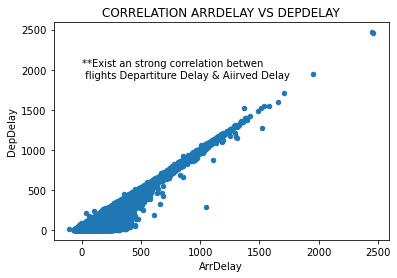

<Figure size 432x288 with 0 Axes>

In [300]:
# Correlation
layout.plot(kind='scatter', y='DepDelay', x='ArrDelay')
plt.text(-.5,1900, '**Exist an strong correlation betwen\n flights Departiture Delay & Aiirved Delay')
plt.title('CORRELATION ARRDELAY VS DEPDELAY')
plt.show()
plt.savefig('fig8.png')

<span style='color:purple'>
<h4>
  
* Three variables (ArrDelay, DepDelay i UniqueCarrier)
   
</span>

===================== BAR GRAPHIC WITH 2 VAR NUM AND 1 VAR CAT ======================


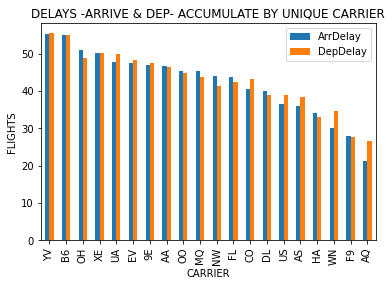

<Figure size 432x288 with 0 Axes>

In [172]:
#Three variables , 2 numeric varibles and 1 variable categorical
print('===================== BAR GRAPHIC WITH 2 VAR NUM AND 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay','DepDelay']].sort_values(by='ArrDelay',ascending=False).plot(kind='bar')
plt.title('DELAYS -ARRIVE & DEP- ACCUMULATE BY UNIQUE CARRIER')
plt.xlabel('CARRIER')
plt.ylabel('FLIGHTS')
plt.legend();
plt.show()
plt.savefig('fig9.png')

<span style='color:purple'>
<h4>
  
* Three variables (ArrDelay, DepDelay i UniqueCarrier)
   
</span>

===================== LINE GRAPHIC WITH 2 VAR NUM AND 1 VAR CAT ======================


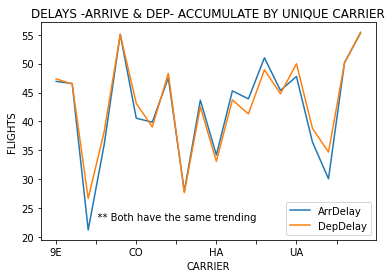

<Figure size 432x288 with 0 Axes>

In [297]:
print('===================== LINE GRAPHIC WITH 2 VAR NUM AND 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay','DepDelay']].plot(kind='line')
plt.text(1.8,23, '    ** Both have the same trending')
plt.title('DELAYS -ARRIVE & DEP- ACCUMULATE BY UNIQUE CARRIER')
plt.xlabel('CARRIER')
plt.ylabel('FLIGHTS')
plt.legend();
plt.show()
plt.savefig('fig10.png')

<span style='color:purple'>
<h4>
  
* More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).
   
</span>

===================== LINE GRAPHIC WITH 3 VAR NUM AND 1 VAR CAT ======================


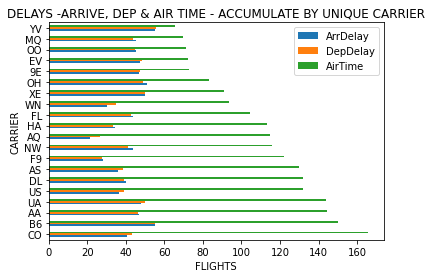

<Figure size 432x288 with 0 Axes>

In [174]:
#Four variables , 3 numeric varibles and 1 variable categorical
print('===================== LINE GRAPHIC WITH 3 VAR NUM AND 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay','DepDelay','AirTime']].sort_values(by='AirTime',ascending=False).plot(kind='barh')
plt.title('DELAYS -ARRIVE, DEP & AIR TIME - ACCUMULATE BY UNIQUE CARRIER')
plt.xlabel('FLIGHTS')
plt.ylabel('CARRIER')
plt.legend();
plt.show()
plt.savefig('fig11.png')

In [ ]:
sns.load_dataset()
sns.pairplot(iris);

<span style='color:purple'>
<h4>
  
* More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier)
   
</span>

===================== LINE GRAPHIC WITH 3 VAR NUM AND 1 VAR CAT ======================


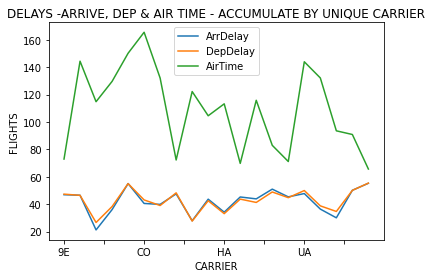

<Figure size 432x288 with 0 Axes>

In [175]:
print('===================== LINE GRAPHIC WITH 3 VAR NUM AND 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay','DepDelay','AirTime']].plot(kind='line')
plt.title('DELAYS -ARRIVE, DEP & AIR TIME - ACCUMULATE BY UNIQUE CARRIER')
plt.xlabel('CARRIER')
plt.ylabel('FLIGHTS')
plt.legend();
plt.show()
plt.savefig('fig12.png')

<span style='color:purple'>
<h4>

4.1.2 Exercise 
    
Export the graphics as images or as html.
   
</span>

In [176]:
#See file attach in GIITHUB

<span style='color:purple'>
<h4>

4.1.3 Exercise 
    
Integrate the graphic visualizations, in booth 5, of Sprint 3
</span>

<span style='color:purple'>
<h4>

A) Summarize the columns of interest statistically
</span>

In [324]:
#Extract the columns of interest
derived_layout = layout[['DepDelay', 'Distance', 'ActualElapsedTime', 'ArrDelay', 'WeatherDelay', 'SecurityDelay']]
print("DESCRIPTIVE STATISTICS:COLUMNS OF INTEREST")
derived_layout.describe().round(2)

DESCRIPTIVE STATISTICS:COLUMNS OF INTEREST


,DepDelay,Distance,ActualElapsedTime,ArrDelay,WeatherDelay,SecurityDelay
count,1936758.00,1936758.00,1928371.00,1928371.00,1247488.00,1247488.00
mean,43.19,765.69,133.31,42.20,3.70,0.09
std,53.40,574.48,72.06,56.78,21.49,2.02
min,6.00,11.00,14.00,-109.00,0.00,0.00
25%,12.00,338.00,80.00,9.00,0.00,0.00
50%,24.00,606.00,116.00,24.00,0.00,0.00
75%,53.00,998.00,165.00,56.00,0.00,0.00
max,2467.00,4962.00,1114.00,2461.00,1352.00,392.00


Text(0.5, 1.0, 'DISTRIBUTIONS AND RELATIONSHIPS IN DATASET')

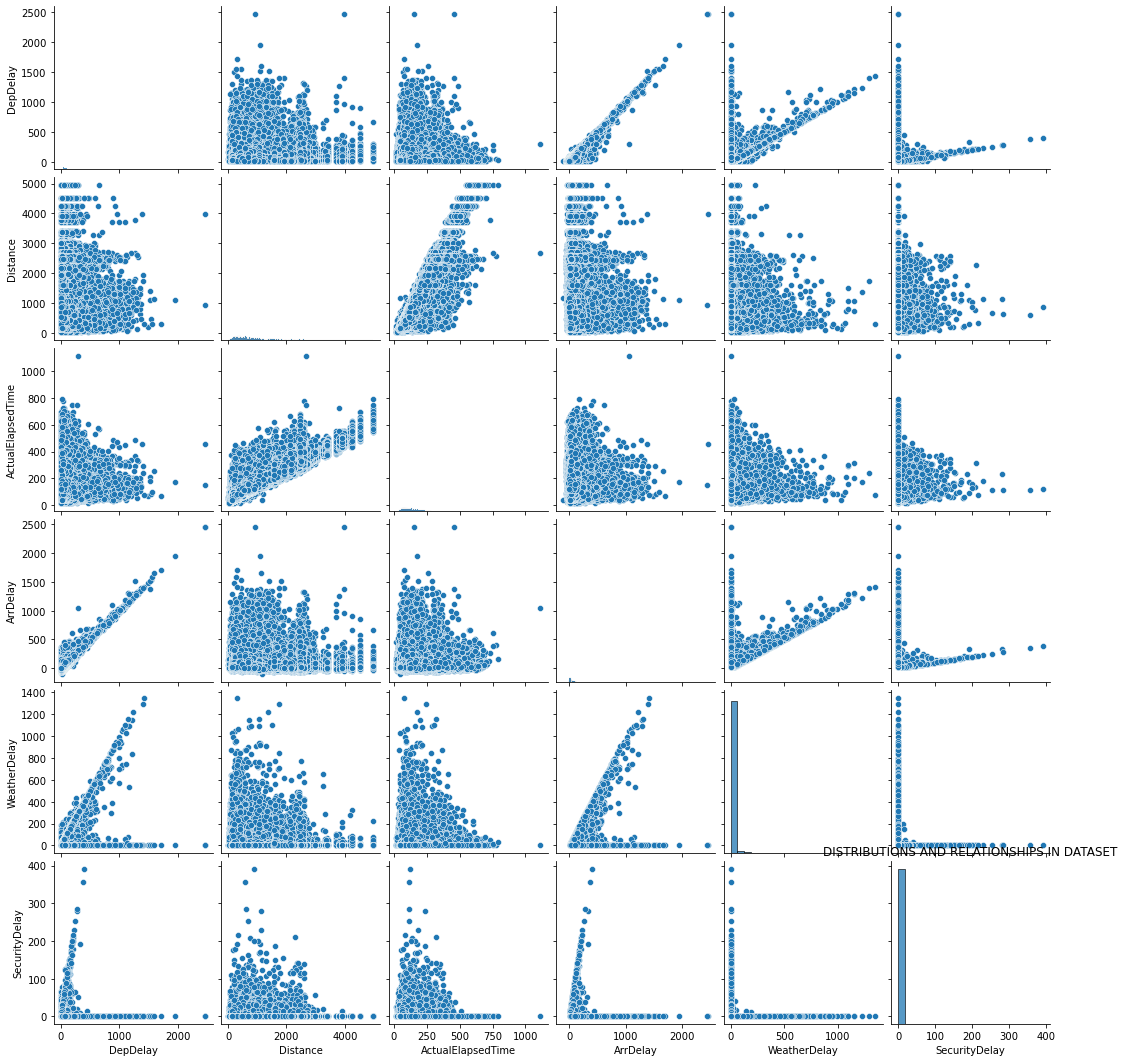

In [326]:
#graph of multiple bivariate distributions of data sets
sns.pairplot(derived_layout)
plt.title('DISTRIBUTIONS AND RELATIONSHIPS IN DATASET')

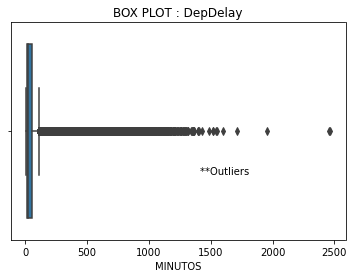

In [301]:
#Analisys for DepDelay, outliers & whiskers
sns.boxplot (x=layout['DepDelay'])
plt.text(1.9, .2, '                                                        **Outliers')
plt.title('BOX PLOT : DepDelay')
plt.xlabel('MINUTOS')
plt.ylabel('')
boxplot.plot()
plt.show()

In [179]:
new_table_stat.dtypes

count    float64
mean     float64
min      float64
25%      float64
50%      float64
75%      float64
max      float64
dtype: object

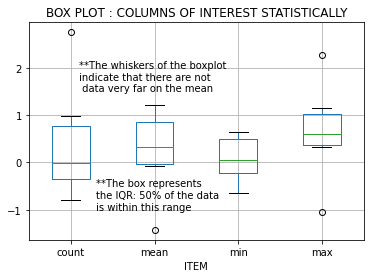

In [302]:
import math
import cmath
from matplotlib import pylab, mlab, pyplot
new_table_stat.columns
np.random.seed(5000000)
new_table_stat = pd.DataFrame(np.random.randn(6, 7), columns=['count', 'mean', 'min', '25%', '50%', '75%', 'max'])
boxplot = new_table_stat.boxplot(column=['count', 'mean', 'min', 'max'])
plt.text(1.3, -1.0, '**The box represents\nthe IQR: 50% of the data\nis within this range')
plt.text(1.1,1.5, '**The whiskers of the boxplot\nindicate that there are not \n data very far on the mean')
plt.title('BOX PLOT : COLUMNS OF INTEREST STATISTICALLY')
plt.xlabel('ITEM')
plt.ylabel('')
boxplot.plot()
plt.show()

<span style='color:purple'>
<h4>

C) Create new columns: Average flight speed
     
</span>

In [181]:
# Speed is equal to dictance over time flight

layout['Average_Flight_Speed'] = ((layout['Distance']/layout['ActualElapsedTime'])*60).round(2)

=====================  GRAPHIC C ======================


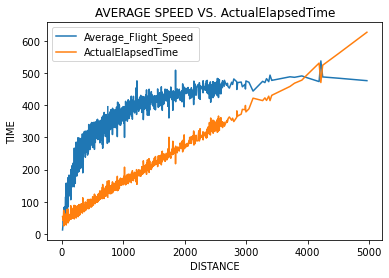

In [182]:
print('=====================  GRAPHIC C ======================')
layout.groupby('Distance').mean().loc[:,['Average_Flight_Speed','ActualElapsedTime']].plot(kind='line')
plt.title('AVERAGE SPEED VS. ActualElapsedTime')
plt.xlabel('DISTANCE')
plt.ylabel('TIME')
plt.legend();
plt.show()

<span style='color:purple'>
<h4>

D) Create new columns: Whether late or not
     
</span>

In [34]:
import pandas as pd # Importacion estandar de la libreria Pandas


def Arrives(arrive):
    arrive = float(arrive.ArrDelay)
    
    if arrive <0:
        return 'Early'
    if arrive ==0:
        return 'On time'
    if arrive >0:
        return 'Late'
    else:
        return 'No avaiable'

layout['Arrived_OnTime_or_Not'] = pd.to_numeric(layout['ArrDelay'], errors='ignore')  
layout['Arrived_OnTime_or_Not'] = layout.apply(Arrives, axis=1)

#Print table with subtotals by status
print ('ARRIVAL STATUS SUBTOTALS')
tabla=layout.groupby(['Arrived_OnTime_or_Not']).size().reset_index(name='Total_Flight')
tabla

ARRIVAL STATUS SUBTOTALS


,Arrived_OnTime_or_Not,Total_Flight
0,Early,177916
1,Late,1723415
2,No avaiable,8387
3,On time,27040


===================== GRAPHIC D ======================


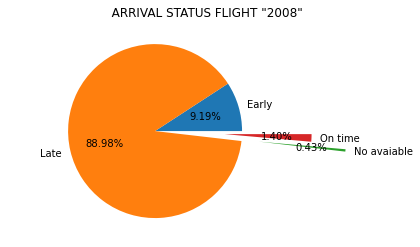

In [305]:
%matplotlib inline
import matplotlib.pyplot as plt

print('===================== GRAPHIC D ======================')
explode_vals=[0,0,1.2,.8]
plt.pie(tabla['Total_Flight'],labels=tabla['Arrived_OnTime_or_Not'], autopct='%1.2f%%', explode = explode_vals)
plt.title('                           ARRIVAL STATUS FLIGHT "2008"')

plt.show()

<span style='color:purple'>
<h4>

E) Table of airlines with the most accumulated arrears
     
</span>

In [36]:
#To generate a table with largest delays flight by carrier I try severals subtables
#I will generate several subtables that I call lists but they are not actually lists

listCarrier = layout[['UniqueCarrier','Arrived_OnTime_or_Not']]
Table_List_Carrier1=listCarrier.groupby(["UniqueCarrier", 'Arrived_OnTime_or_Not'])['Arrived_OnTime_or_Not'].count()
listCarrier2 = layout[['UniqueCarrier','CarrierDelay']]
listCarrier2.sort_values(by = "CarrierDelay", ascending =False)
Table_List_Carrier3=listCarrier2.groupby(['UniqueCarrier','CarrierDelay']).size().reset_index(name='Total')

print('FIRTS FIVE CARRIERS WITH LONGER DELAY TIME ACCUMULATED IN "2008"')
Table_LongerD = listCarrier2.groupby('UniqueCarrier')['CarrierDelay'].sum().nlargest(5).reset_index(name='time_delays_acc')
Table_LongerD

FIRTS FIVE CARRIERS WITH LONGER DELAY TIME ACCUMULATED IN "2008"


,UniqueCarrier,time_delays_acc
0,AA,2821907.0
1,WN,2261002.0
2,YV,1906001.0
3,UA,1720150.0
4,MQ,1705271.0


===================== GRAPHIC E ======================


Text(0, 0.5, 'TIME DELAY ACCUMULATE')

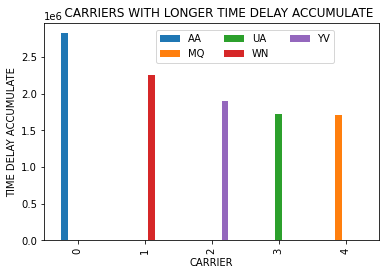

In [307]:
print('===================== GRAPHIC E ======================')
Table_LongerD = listCarrier2.groupby('UniqueCarrier')['CarrierDelay'].sum().nlargest(5).reset_index(name='time_delays_acc')
Table_LongerD = Table_LongerD.pivot_table(values="time_delays_acc", columns="UniqueCarrier", index=Table_LongerD['UniqueCarrier'].index)
Table_LongerD.plot(kind="bar", legend=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.6, .99),fontsize='medium', frameon=True)
plt.title('    CARRIERS WITH LONGER TIME DELAY ACCUMULATE')
plt.xlabel('CARRIER')
plt.ylabel('TIME DELAY ACCUMULATE')

<span style='color:purple'>
<h4>

F) FWhat are the longest flights?
     
</span>

In [38]:
#Create a list for review distance vs arrive delay
listDistance = layout[['Distance','Arrived_OnTime_or_Not']]

#Concatenate origin and destination for obtain the stretch of travel
layout['Flight_Origin_Dest'] = layout['Origin'] + ' - ' + layout['Dest']

#Convert to string column Flight_Origin_Dest
layout['Flight_Origin_Dest'] = layout['Flight_Origin_Dest'].astype('category')

#Create a list and sort it in descending order
listFlight1 = layout[['Flight_Origin_Dest','Distance','ArrDelay']]
listFlight2 = pd.pivot_table(listFlight1, index='Flight_Origin_Dest')
listFlight2.sort_values('Distance', inplace =True, ascending=False)

print ('FIRST FIVE LONGER TRIP CONSIDERING DISTANCE (Miles) : ORIGIN - DESTINATION'+ '')
Table_Longer=listFlight2.head(5)
Table_Longer

FIRST FIVE LONGER TRIP CONSIDERING DISTANCE (Miles) : ORIGIN - DESTINATION


,ArrDelay,Distance
Flight_Origin_Dest,,
HNL - EWR,57.070175,4962
EWR - HNL,26.875472,4962
HNL - ATL,41.443709,4502
ATL - HNL,33.346405,4502
ORD - HNL,36.956311,4243


===================== GRAPHIC F ======================
          CORRELATION : DISTANCE - AARIVE DELAY


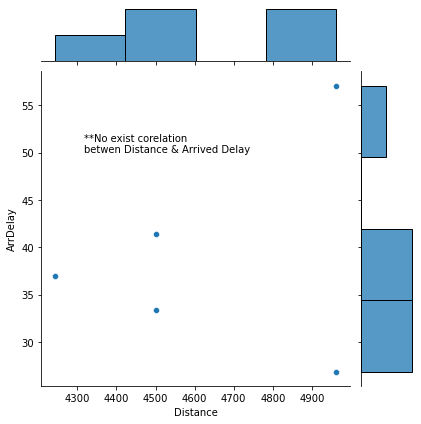

In [308]:
print('===================== GRAPHIC F ======================')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.jointplot(Table_Longer['Distance'],Table_Longer['ArrDelay'])
print ('          CORRELATION : DISTANCE - AARIVE DELAY'+ '')
plt.text(-10.9, 50, '**No exist corelation \nbetwen Distance & Arrived Delay')
warnings.filterwarnings('ignore')
plt.show()

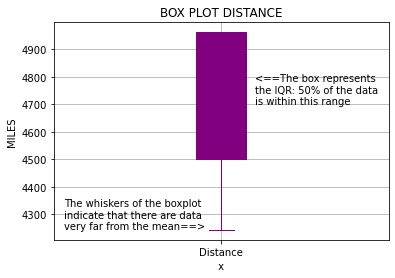

In [317]:
import math
import cmath
from matplotlib import pylab, mlab, pyplot

np.random.seed(6000000)

boxplot = Table_Longer.boxplot(column=['Distance'], color='purple', patch_artist = True)
plt.text(1.1, 4700, '<==The box represents\nthe IQR: 50% of the data\nis within this range')
plt.text(.53, 4245, 'The whiskers of the boxplot\nindicate that there are data\nvery far from the mean==>')
plt.title('BOX PLOT DISTANCE')
plt.xlabel(' x ')
plt.ylabel('MILES')
boxplot.plot()
plt.show()

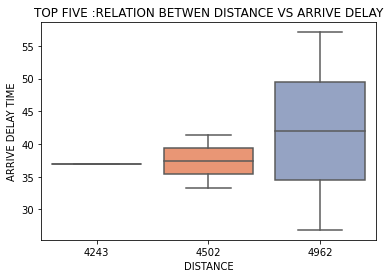

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sns.set_palette('Set2')
sns.boxplot(data=Table_Longer, y='ArrDelay', x='Distance')
plt.title('TOP FIVE :RELATION BETWEN DISTANCE VS ARRIVE DELAY')
plt.xlabel('DISTANCE')
plt.ylabel('ARRIVE DELAY TIME')
plt.show()

<span style='color:purple'>
<h4>

    
G)And the most backward?

    
</span>

In [74]:
# Index table by Orig-Dest and ArrDelay
Table_List_Delay=listFlight1.groupby(['Flight_Origin_Dest','ArrDelay']).size().reset_index(name='Total')

# Sort by ArrDelay
Table_List_Delay.sort_values('ArrDelay', inplace =True, ascending=False)

print ('FIRST FIVE MOST BACKWARD ORIGIN-DESTINATION')
Table_Backward = Table_List_Delay.head(5)
Table_Backward

FIRST FIVE MOST BACKWARD ORIGIN-DESTINATION


,Flight_Origin_Dest,ArrDelay,Total
5871239,YUM - SLC,2461.0,0
5008319,SAT - MSP,2461.0,0
3801359,MSP - BGR,2461.0,0
2065367,FLG - PHX,2461.0,0
2620343,ICT - MSY,2461.0,0


===================== GRAPHIC G ======================


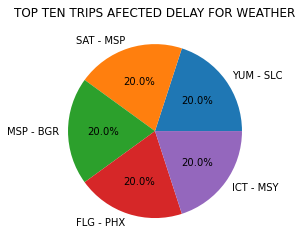

In [75]:
print('===================== GRAPHIC G ======================')
plt.pie(Table_Backward['ArrDelay'],labels=Table_Backward['Flight_Origin_Dest'], autopct='%1.1f%%')
plt.title('TOP TEN TRIPS AFECTED DELAY FOR WEATHER')

plt.show()

<span style='color:purple'>
<h4>

    
H)XXXXXXXXXXX

    
</span>

Extra Graphic 

Text(0.5, 1.0, 'DENSITY FOR MONTH')

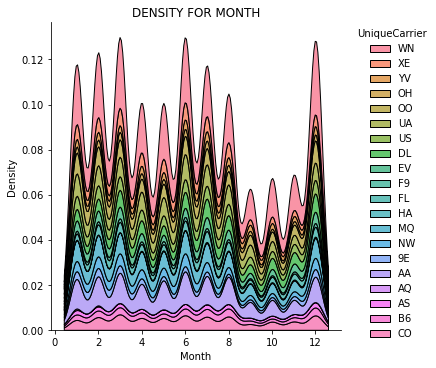

In [50]:
#Check density for month...

sns.displot(data=layout, x='Month', hue='UniqueCarrier', multiple='stack', kind='kde')
plt.title('DENSITY FOR MONTH')

Text(0.5, 1.0, 'PROPORTION FOR MONTH')

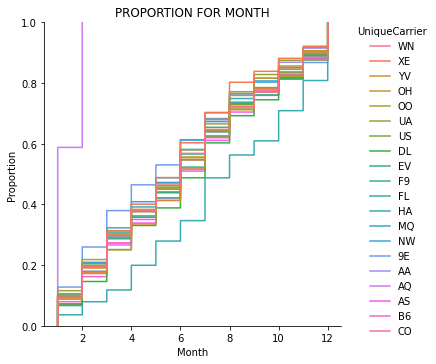

In [51]:
#Check proportion for month...
sns.displot(data=layout, x='Month', hue='UniqueCarrier', kind='ecdf')
plt.title('PROPORTION FOR MONTH')

No handles with labels found to put in legend.


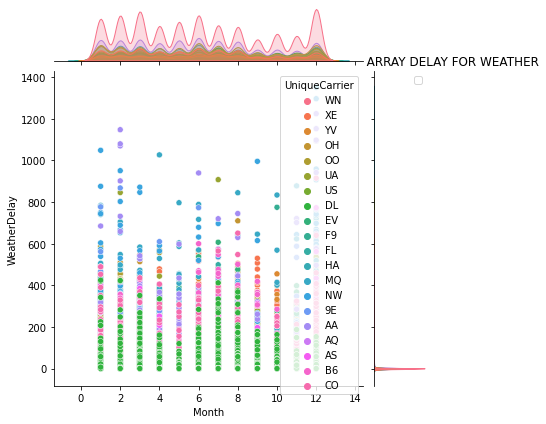

In [321]:
#Check arrival delays due to weather...

sns.jointplot(data=layout, x='Month', y='WeatherDelay', hue='UniqueCarrier', kind='scatter')
plt.legend(loc='center right', ncol=3, bbox_to_anchor=(1, .99),fontsize='medium', frameon=False)
plt.title('                           ARRAY DELAY FOR WEATHER')
warnings.filterwarnings('ignore')